<a href="https://colab.research.google.com/github/AlineBautista/Simulaci-n-1/blob/main/Proyecto_Ing_Financiera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

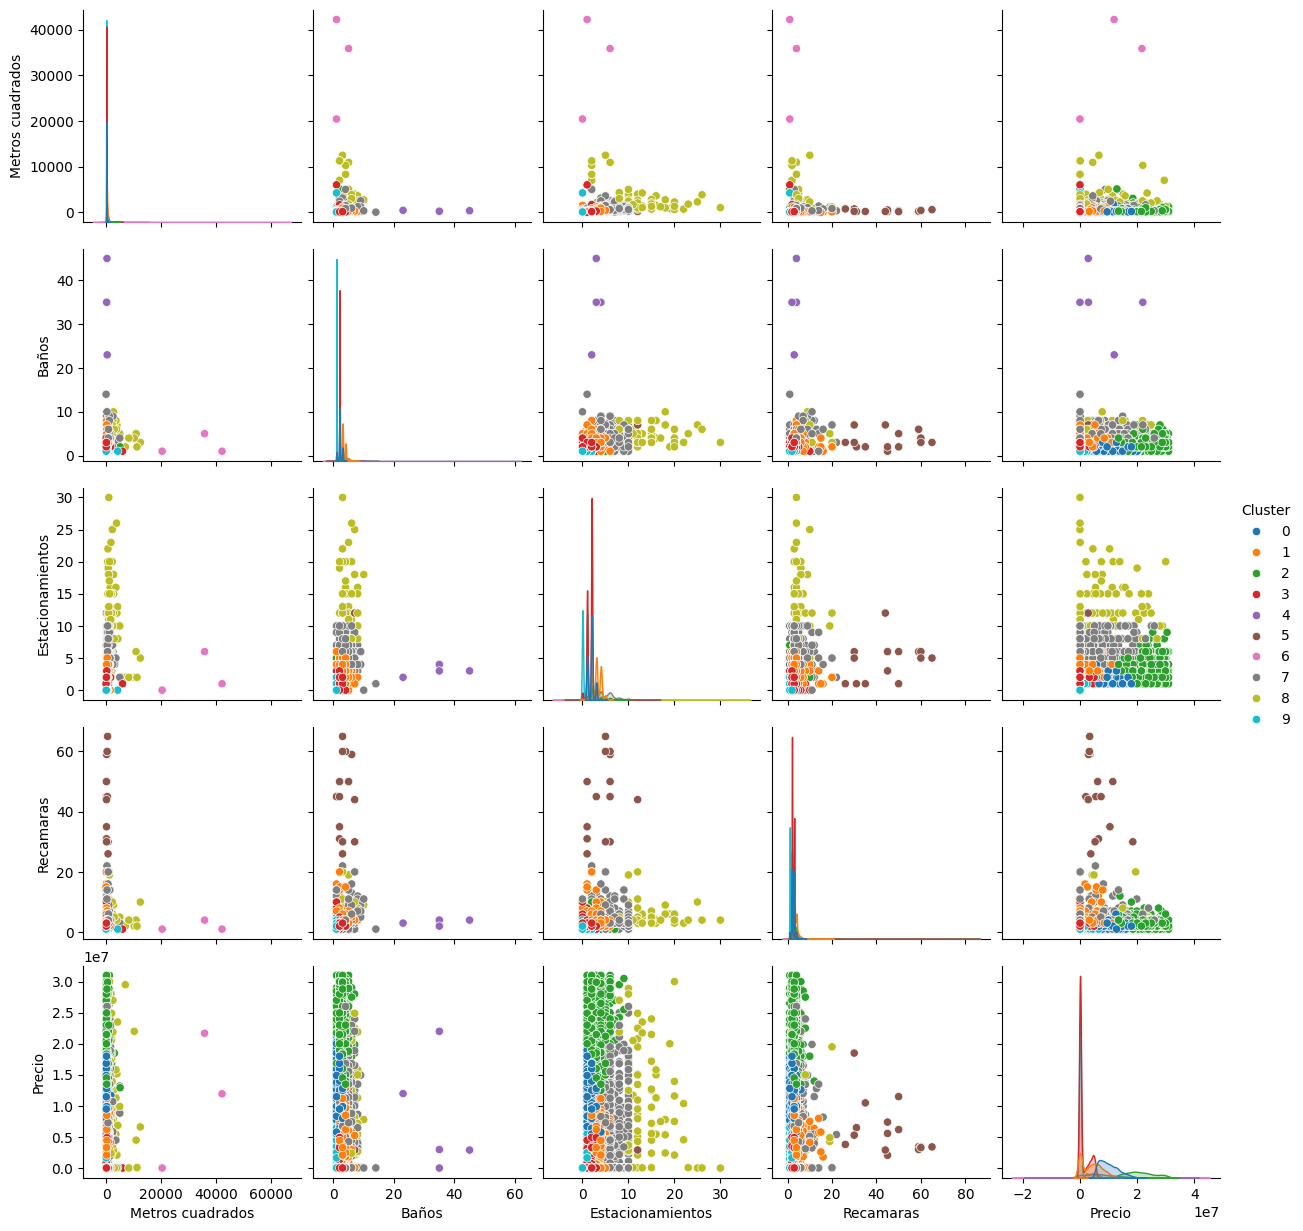


ROI promedio por cluster:
Cluster
0    0.072937
1    0.047340
2    0.029461
3    0.034934
4    0.069573
5    0.061375
6    0.047439
7    0.089623
8    0.040511
9    0.067878
Name: ROI, dtype: float64


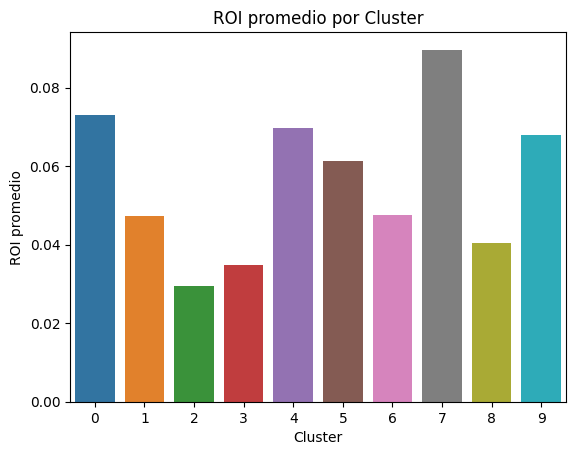

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

inmuebles_venta = pd.read_csv('inmuebles_venta.csv')
inmuebles_renta = pd.read_csv('inmuebles_renta.csv')

inmuebles_venta.dropna(inplace=True)
inmuebles_renta.dropna(inplace=True)
def eliminar_datosatipicos(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df_filtrado

inmuebles_venta = eliminar_datosatipicos(inmuebles_venta, 'Precio')
inmuebles_renta = eliminar_datosatipicos(inmuebles_renta, 'Precio')

datos = pd.concat([inmuebles_venta, inmuebles_renta], keys=['venta', 'renta']).reset_index(level=0)
datos = eliminar_datosatipicos(datos, 'Precio')

datos = pd.concat([inmuebles_venta, inmuebles_renta], keys=['venta', 'renta']).reset_index(level=0)

columnas_numericas = ['Metros cuadrados', 'Baños', 'Estacionamientos', 'Recamaras', 'Precio']
scaler = StandardScaler()

datos_normalizados = scaler.fit_transform(datos[columnas_numericas])

kmeans = KMeans(n_clusters=10, random_state=42)
datos['Cluster'] = kmeans.fit_predict(datos_normalizados)

sns.pairplot(datos, hue='Cluster', vars=columnas_numericas, palette='tab10')
plt.show()

datos_renta = datos[datos['level_0'] == 'renta']
datos_venta = datos[datos['level_0'] == 'venta']

datos_venta.set_index(['Colonia', 'Delegacion'], inplace=True)
datos_renta.set_index(['Colonia', 'Delegacion'], inplace=True)

roi_data = datos_venta.join(datos_renta, lsuffix='_venta', rsuffix='_renta', how='inner')
roi_data['Ingreso_Anual_Renta'] = roi_data['Precio_renta'] * 12
roi_data['ROI'] = roi_data['Ingreso_Anual_Renta'] / roi_data['Precio_venta']

kmeans = KMeans(n_clusters=10, random_state=42)
roi_data.rename(columns={
'Metros cuadrados_venta': 'Metros cuadrados',
'Baños_venta': 'Baños',
'Estacionamientos_venta': 'Estacionamientos',
'Recamaras_venta': 'Recamaras',
'Precio_venta': 'Precio'
}, inplace=True)
roi_data['Cluster'] = kmeans.fit_predict(scaler.transform(roi_data[columnas_numericas]))

roi_promedio_cluster = roi_data.groupby('Cluster')['ROI'].mean()


print("\nROI promedio por cluster:")
print(roi_promedio_cluster)

sns.barplot(x=roi_promedio_cluster.index, y=roi_promedio_cluster.values, palette='tab10')
plt.title('ROI promedio por Cluster')
plt.xlabel('Cluster')
plt.ylabel('ROI promedio')
plt.show()


In [ ]:
venta_promedio_cluster = roi_data.groupby('Cluster')['Precio'].mean()
renta_promedio_cluster = roi_data.groupby('Cluster')['Precio_renta'].mean()

print("\nVenta promedio por cluster:")
print(venta_promedio_cluster)

print("\nRenta promedio por cluster:")
print(renta_promedio_cluster)



Venta promedio por cluster:
Cluster
0    8.901212e+06
1    1.515347e+07
2    2.351018e+07
3    2.080455e+07
4    8.825516e+06
5    7.773453e+06
6    1.515330e+07
7    6.941093e+06
8    1.719861e+07
9    1.000323e+07
Name: Precio, dtype: float64

Renta promedio por cluster:
Cluster
0    43591.853918
1    46404.147491
2    56082.048512
3    59650.000000
4    44611.253613
5    32400.708223
6    43736.572816
7    40825.416817
8    55944.507657
9    44915.447782
Name: Precio_renta, dtype: float64


In [ ]:
promedios_por_cluster = datos.groupby('Cluster')[columnas_numericas].mean()

print("\nPromedios por cada Cluster:")
print(promedios_por_cluster)


Promedios por cada Cluster:
         Metros cuadrados      Baños  Estacionamientos  Recamaras  \
Cluster                                                             
0              152.064387   2.067236          1.846154   2.531054   
1              338.771679   3.362239          3.088913   3.551592   
2              337.910402   2.984552          3.027806   3.165808   
3              143.559784   2.158579          1.679036   2.413257   
4              294.000000  34.600000          3.200000   3.400000   
5              327.062500   3.562500          4.750000  45.875000   
6            29716.000000   2.000000          1.750000   1.750000   
7              752.811639   4.272588          6.061256   4.321593   
8             2621.000000   4.860465         12.941860   4.988372   
9               79.080893   1.055087          0.603474   1.541439   

               Precio  
Cluster                
0        1.006317e+07  
1        3.990837e+06  
2        2.104104e+07  
3        1.077825e+06 